## Characterisation of whole genome sequence data from South African Neisseria gonorrhoeae isolates
This notebook will be a documentation of data explored and figures generated for my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa. These are my main objectives:

1) Characterisation of genomes
2) Identification of anti-microbial resistance determinants
3) Comparison of genomes

While I will analyse my South African dataset alone, I will also analyse it in conjunction with (i) other available South African isolate data, (ii) data for isolates across the continent of Africa and (iii) data for isolates across the globe. These additional data will be acquired through the online database PubMLST.

### Introduction

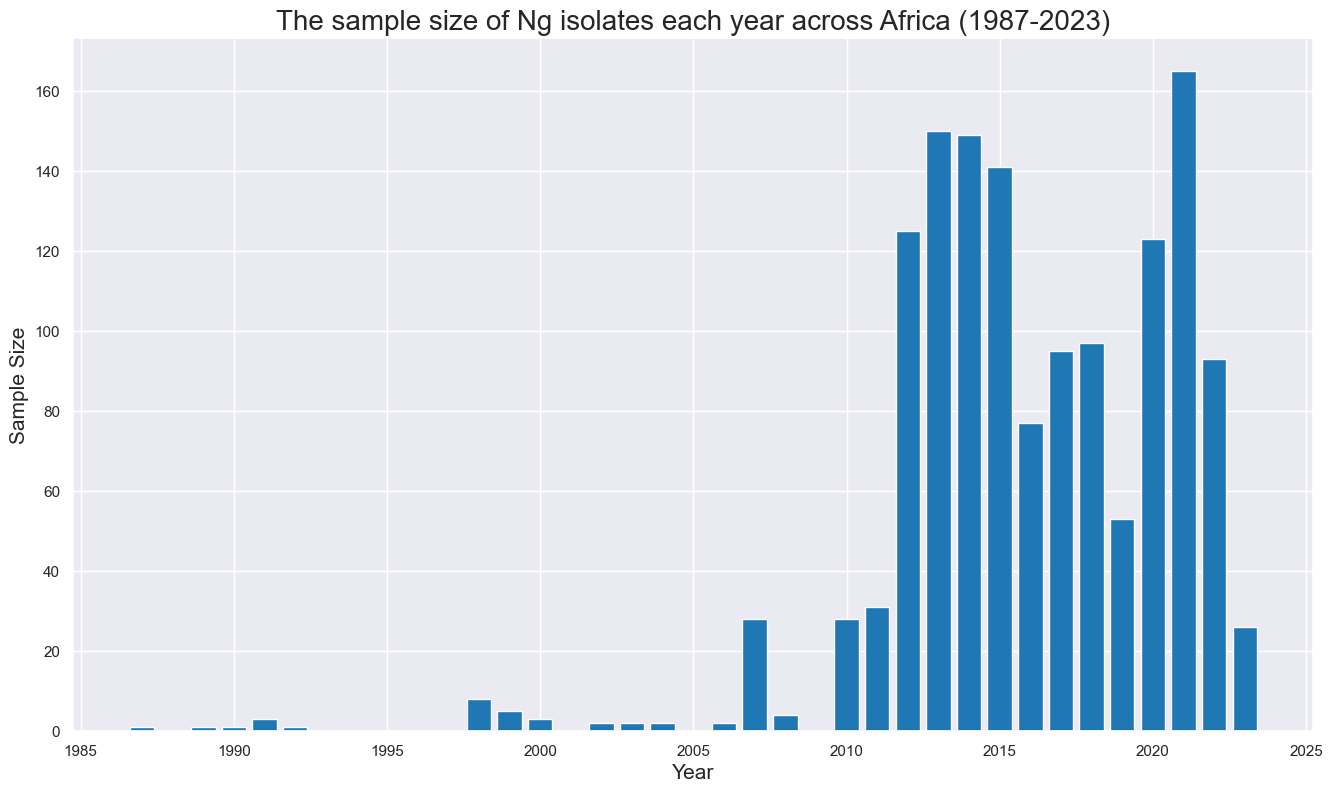

In [302]:
import importlib
import Functions
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

importlib.reload(Functions)


    # importing data from across Africa
afr: pd.DataFrame = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # keeping only ID, country and year
afr.drop(columns = ["private_record", "private_owner"], inplace = True)

    # counting no. samples each year
year_count = afr.groupby("year").year.count()

    # converting series to DataFrame
year_df = pd.DataFrame({"year": year_count.index, "sample_size": year_count.values})


    # bar graph
sns.set_theme(style = "darkgrid")

Functions.bar(x = year_df.year, y = year_df.sample_size, xlab = "Year", ylab = "Sample Size", title = "The sample size of Ng isolates each year across Africa (1987-2023)")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)

plt.show()


This figure shows the number of Neisseria Gonorrhoeae isolates (available on PubMLST) collected across Africa through time. 2012 is the first year that data that forms my South African data was collected. This highlights a major problem regarding surveillance of Neisseria Gonorrhoeae in Africa and the need for projects that collects and analyses large quantities of isolates.

In [303]:
    # counting no. isolates in each combination of country & year
country_year = afr.groupby(["country", "year"]).count().reset_index()
    
    # renaming column header 
country_year.rename(columns = {"id": "sample_size"}, inplace = True)

    
    # creating a pivot table
pivot_df = country_year.pivot_table(index = "year", columns = "country", values = "sample_size")
   

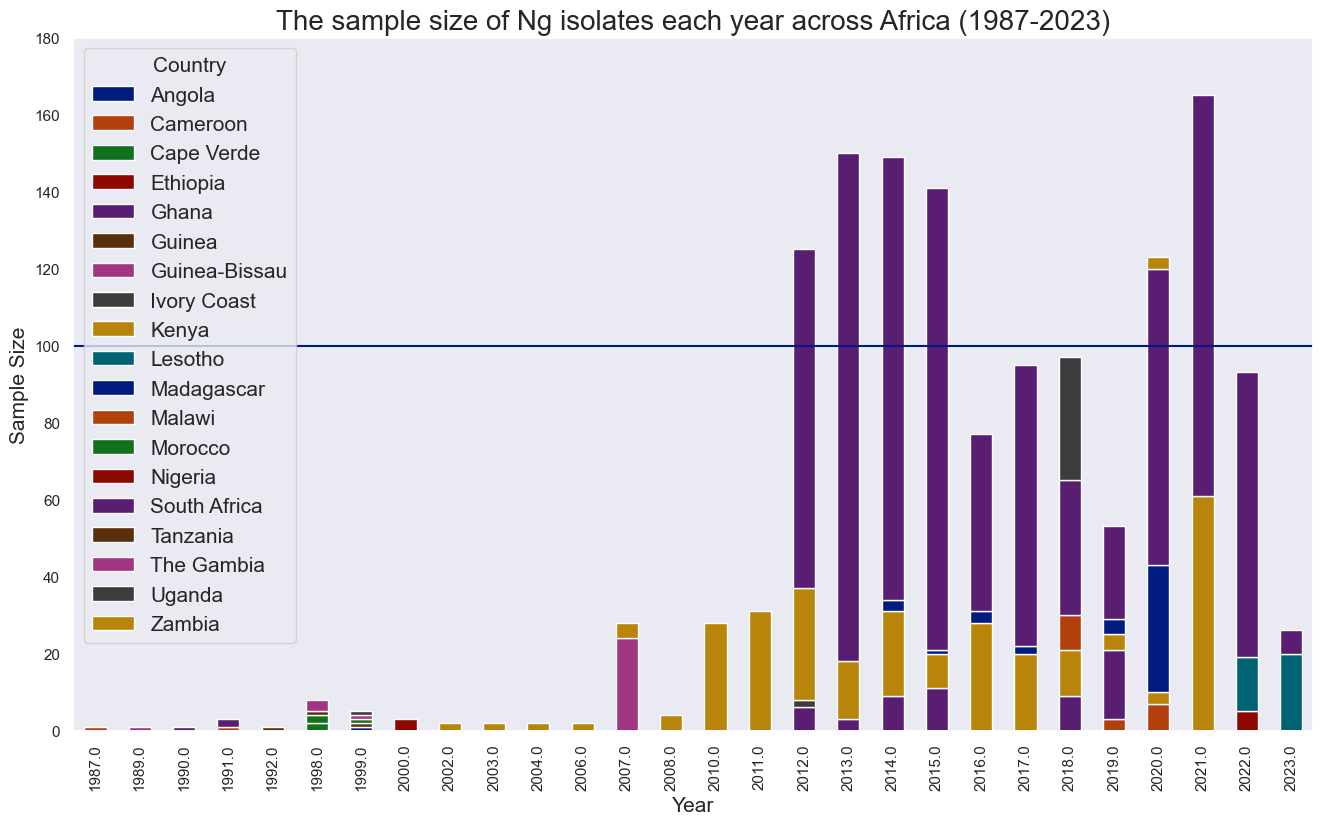

In [304]:
 # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), xlabel = "Year", ylabel = "Sample Size", ylim = (0,180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


Not only is there a lack of good surveillance in Africa but there is large disproportion in terms of the countries that are represented. South Africa makes up a large proportion of the sample, with other countries (mainly Kenya) filling up the rest. However, most of the South African isolates are from my South African data.

In [305]:
    # importing all South African isolates
afr_priv = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # removing all privately owneed isolates by filtering
afr_priv = afr_priv[afr_priv.private_record == False]

    # removing columns
afr_priv.drop(columns = ["private_record", "private_owner"], inplace = True)

    # grouping by country & year
country_year2 = afr_priv.groupby(["country", "year"]).count().reset_index()

    # renaming column "id"
country_year2.rename(columns = {"id": "sample_size"}, inplace = True)

    # creating pivot table
pivot_df2 = country_year2.pivot_table(index = "year", columns = "country", values = "sample_size")


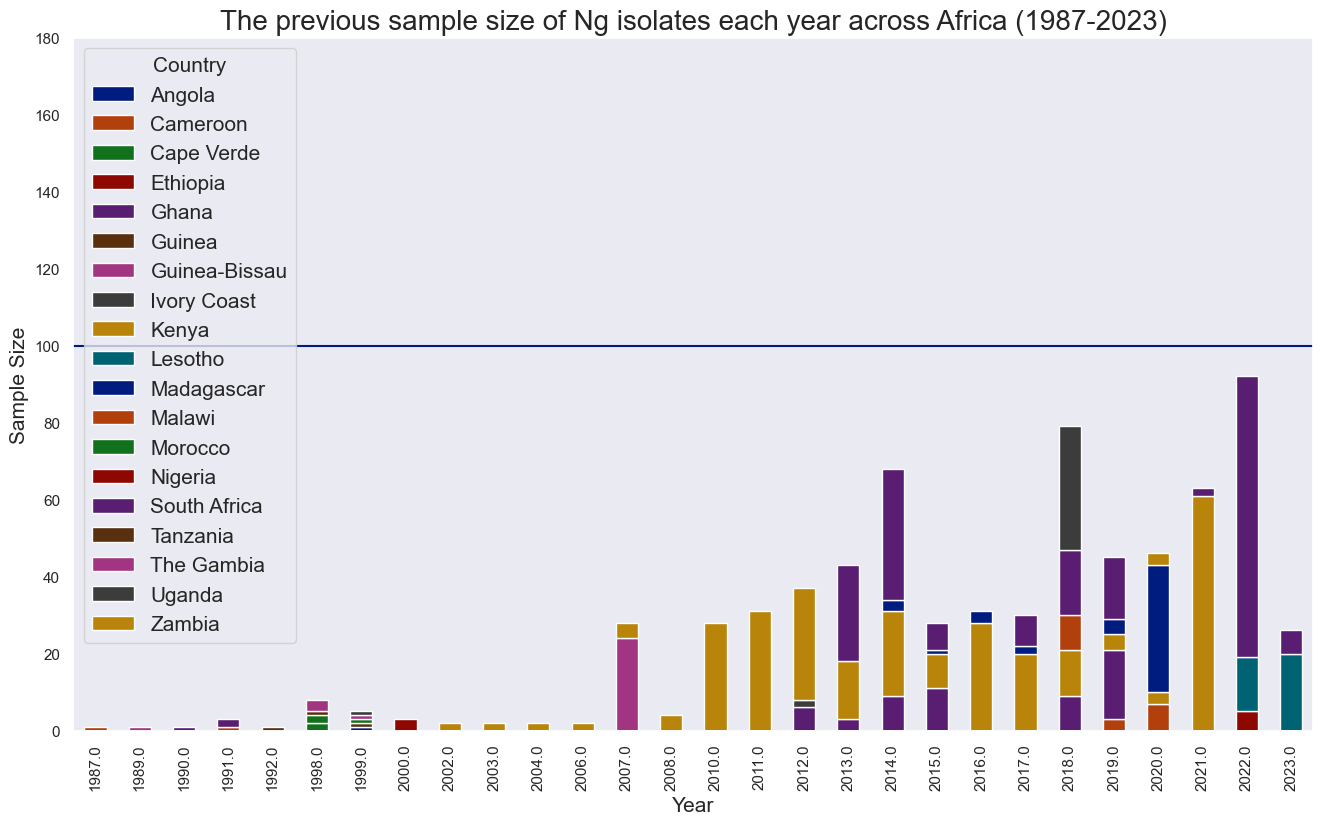

In [306]:
    # creating stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = 15)

plt.show()

This figure shows the isolate collection across Africa, excluding the isolates collected for this project's analysis. It's visible between the two graphs how much of an increase to the overall isolate collection the new South African samples gives.

In [307]:
#fig, ax = plt.subplots(2,1, figsize = (16,9), sharex = True)

#pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[0])

#pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[1])

#ax[0].legend(title = "Country", ncol = 2, fontsize = 12, title_fontsize = 12)
#ax[1].legend().set_visible(False)

#plt.show()


In [308]:
    # replacing all NAs with 0
pivot_df.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr = pivot_df.cumsum(axis = 0)

print(cum_afr.loc[2023.0].sum())

1416.0


Note to self: Only 1416 isolates instead of 1886 because 470 isolates don't have country data.

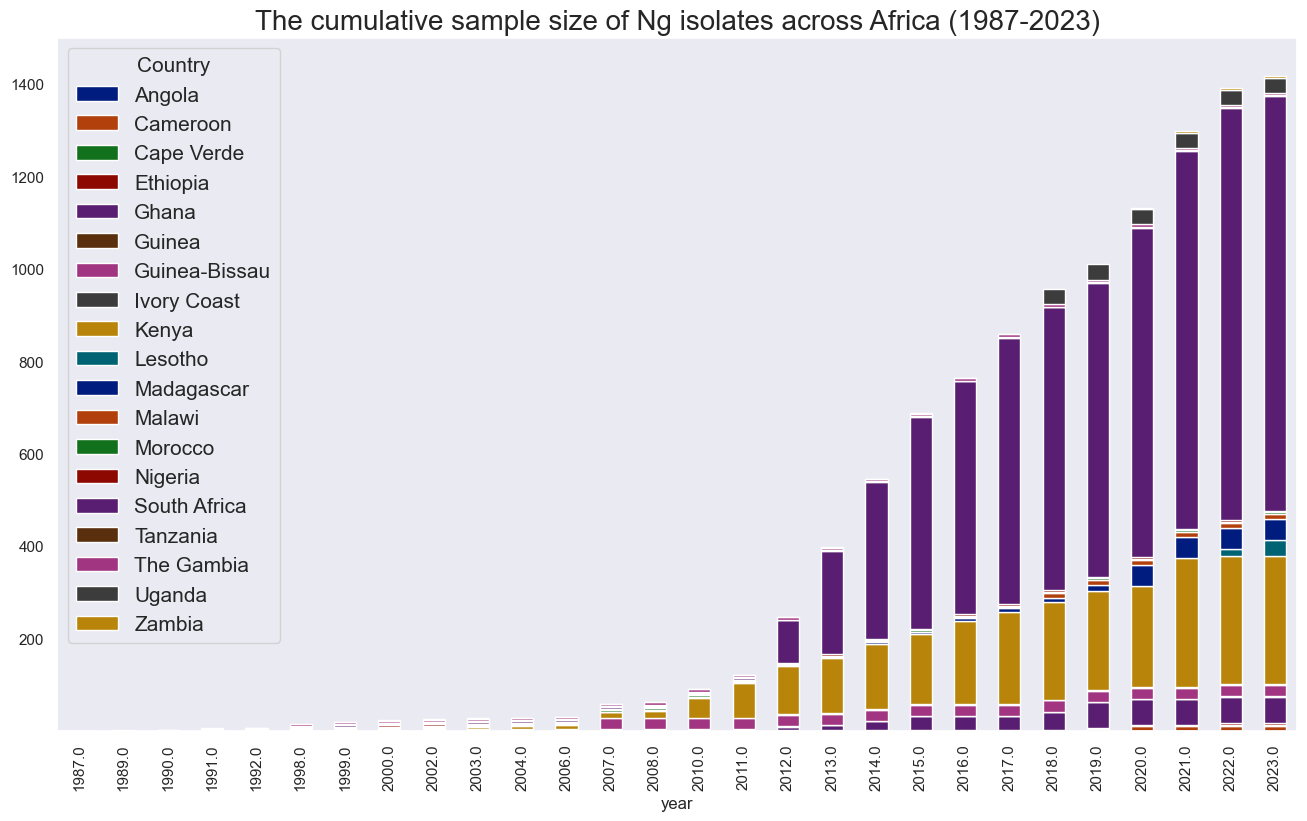

In [309]:
    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (1,1500))

plt.title("The cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


710.0


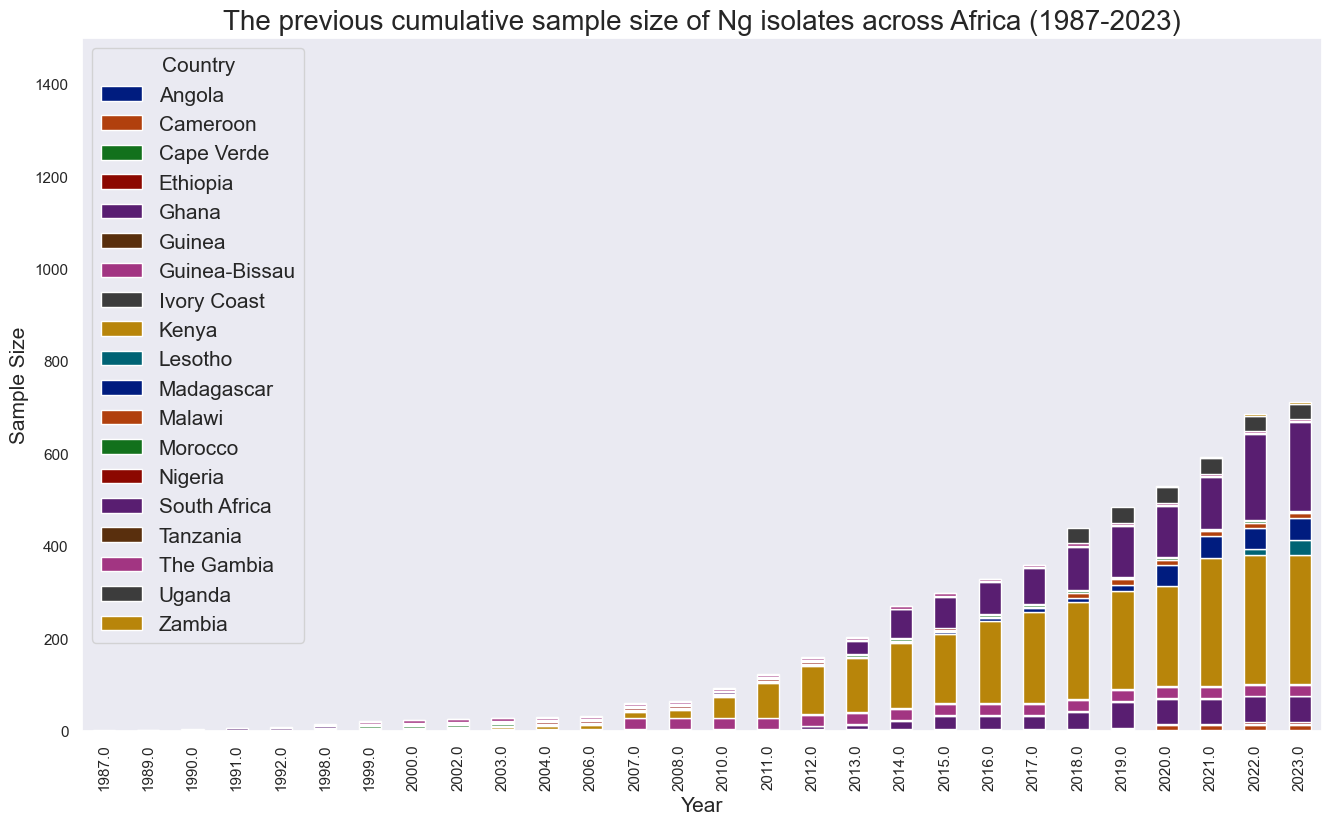

In [310]:
    # replacing all NAs with 0
pivot_df2.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr2 = pivot_df2.cumsum(axis = 0)

print(cum_afr2.loc[2023.0].sum())

    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


The two figures above reiterate the significant relative increase in isolate collection that this project works with. 

### MLST and NG-STAR

In [311]:
    # Importing MLST data for my South African isolates
my_mlst: pd.DataFrame = pd.read_csv("Data/mydata_mlst.csv", sep = ",", header = "infer")
#my_mlst.head()

    # Making ST a categorical variable
my_mlst.ST = my_mlst.ST.astype(str)
#my_mlst.shape


    # ...same process for NG-STAR ST data
my_ngstar: pd.DataFrame = pd.read_csv("Data/mydata_ngstar.csv", sep = ",", header = "infer")
#my_ngstar.head()

my_ngstar.ST = my_ngstar.ST.astype(str)
#my_ngstar.shape

Here, I have imported datasets containing MLST and NGSTAR ST information for my South African isolates.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/1385583112.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/1385583112.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)


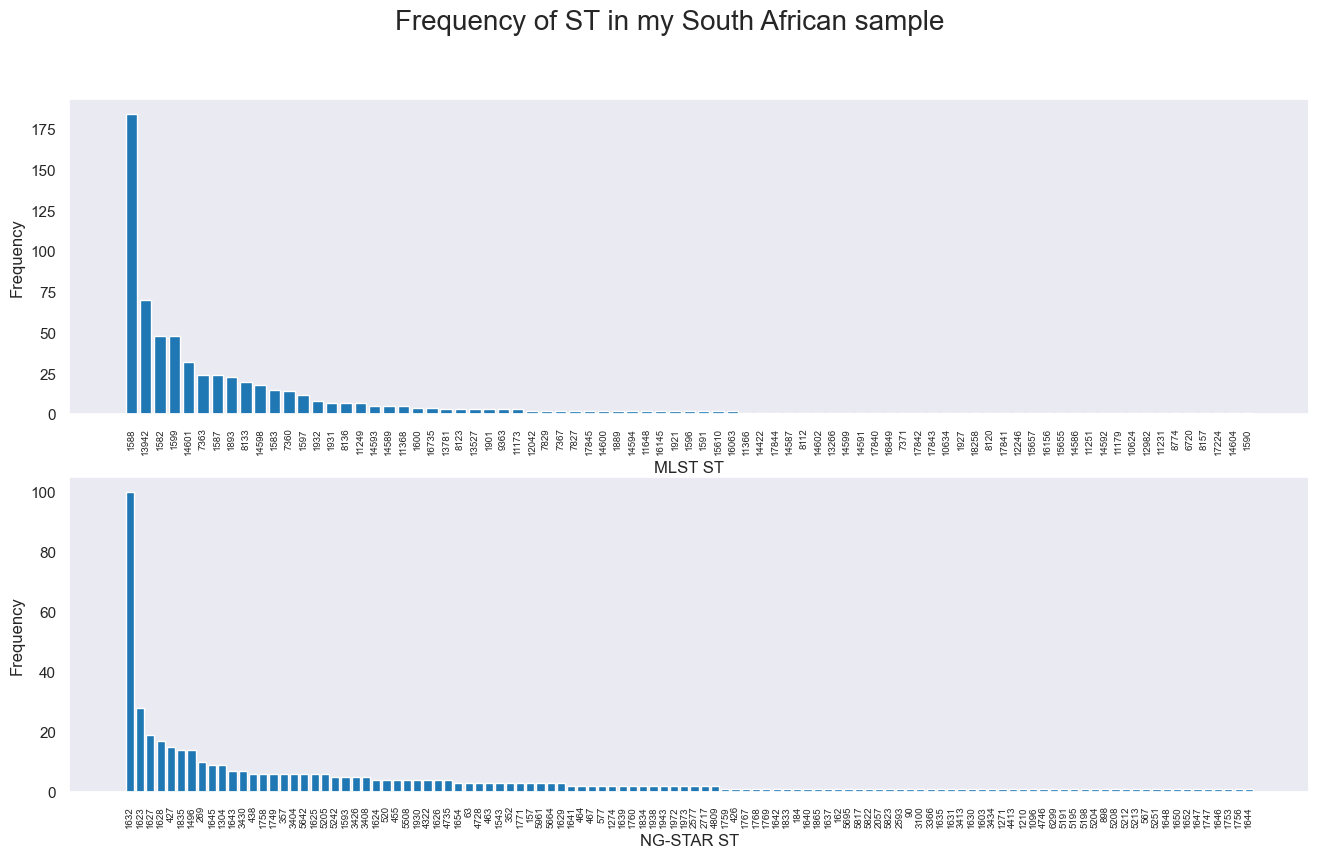

In [312]:
    # Creating a figure with 2 subplots
fig, ax = plt.subplots(2,1, figsize = (16,9))

    # Creating a bar graph to represent MLST frequencies of my South African sample
Functions.bar(x = my_mlst.ST, y = my_mlst.Frequency, xlab = "MLST ST", ylab = "Frequency", ax = ax[0])
    # Changing/adding labels
ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)

    # ...same process for NG-STAR ST frequencies of my South African sample
Functions.bar(x = my_ngstar.ST, y = my_ngstar.Frequency, xlab = "NG-STAR ST", ylab = "Frequency", ax = ax[1])
ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)

    # Adding a title to the figure
fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

    # Showing the figure
plt.show()


I have created a figure with two subplots, each showing a bar graph that represents the frequency of MLST and NG-STAR STs, respectively, in my South African dataset.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/2030900746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/2030900746.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)


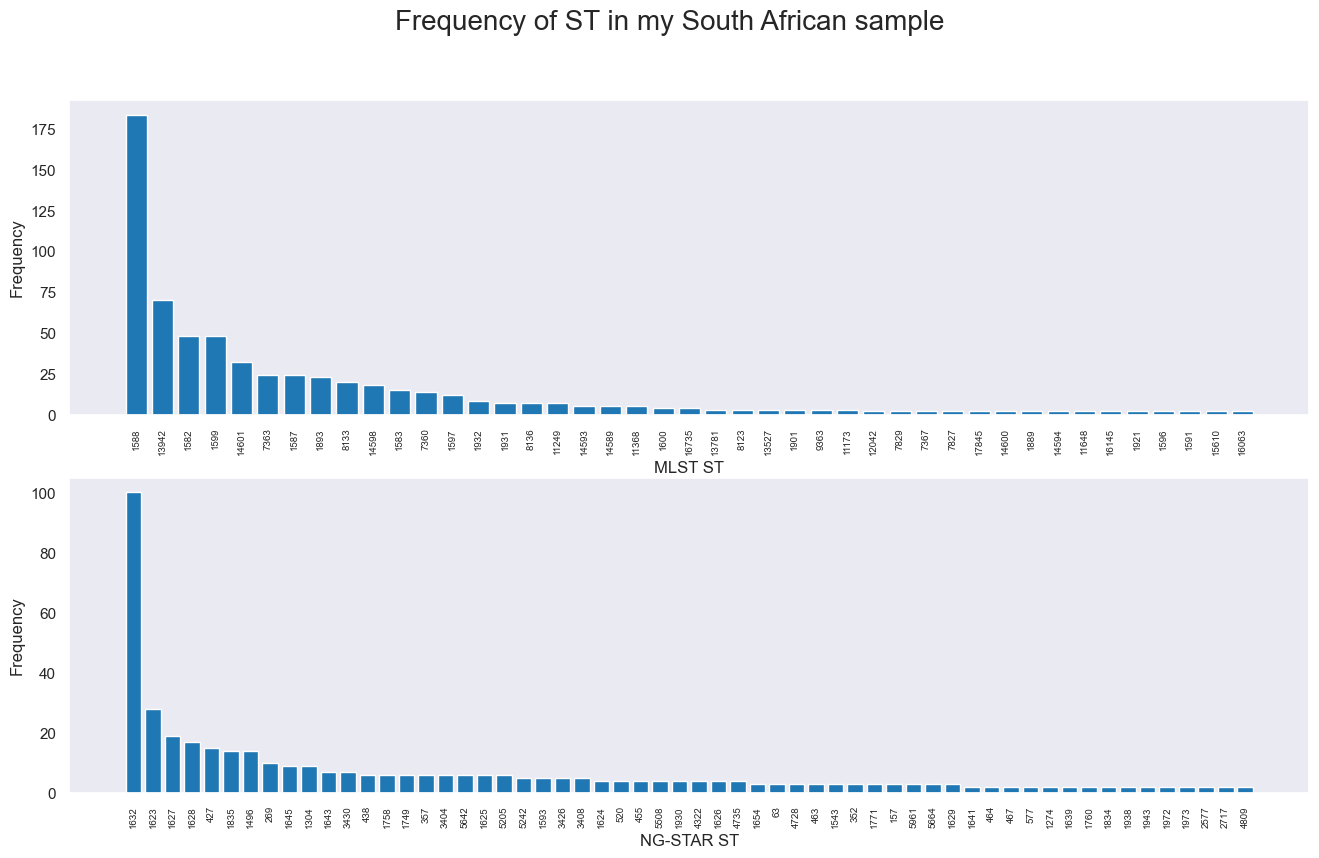

In [313]:
    # Removing rows/bars that represent MLSTs with a frequency of 1
my_mlst2: pd.DataFrame =  my_mlst[my_mlst.Frequency != 1]

    # ...same for NG-STAR STs
my_ngstar2: pd.DataFrame = my_ngstar[my_ngstar.Frequency != 1]


    # Re-doing the figure with the newly-pruned DataFrames
fig, ax = plt.subplots(2,1, figsize = (16,9))

Functions.bar(x = my_mlst2.ST, y = my_mlst2.Frequency, xlab = "MLST ST", ylab = "Frequency", ax = ax[0])
    # Changing/adding labels
ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)

    # ...same process for NG-STAR ST frequencies of my South African sample
Functions.bar(x = my_ngstar2.ST, y = my_ngstar2.Frequency, xlab = "NG-STAR ST", ylab = "Frequency", ax = ax[1])
ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)

    # Adding a title to the figure
fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

    # Showing the figure
plt.show()


Because the previous bar graphs were difficult to discern, I created a subset of the DataFrames that excludes STs with a frequency of 1. This enables a clearer set of bar graphs to be constructed, whereby the most common STs can be identified more easily.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/1916550659.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(sa_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_52480/1916550659.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(sa_ngstar2.ST, rotation = 90, fontsize = 7)


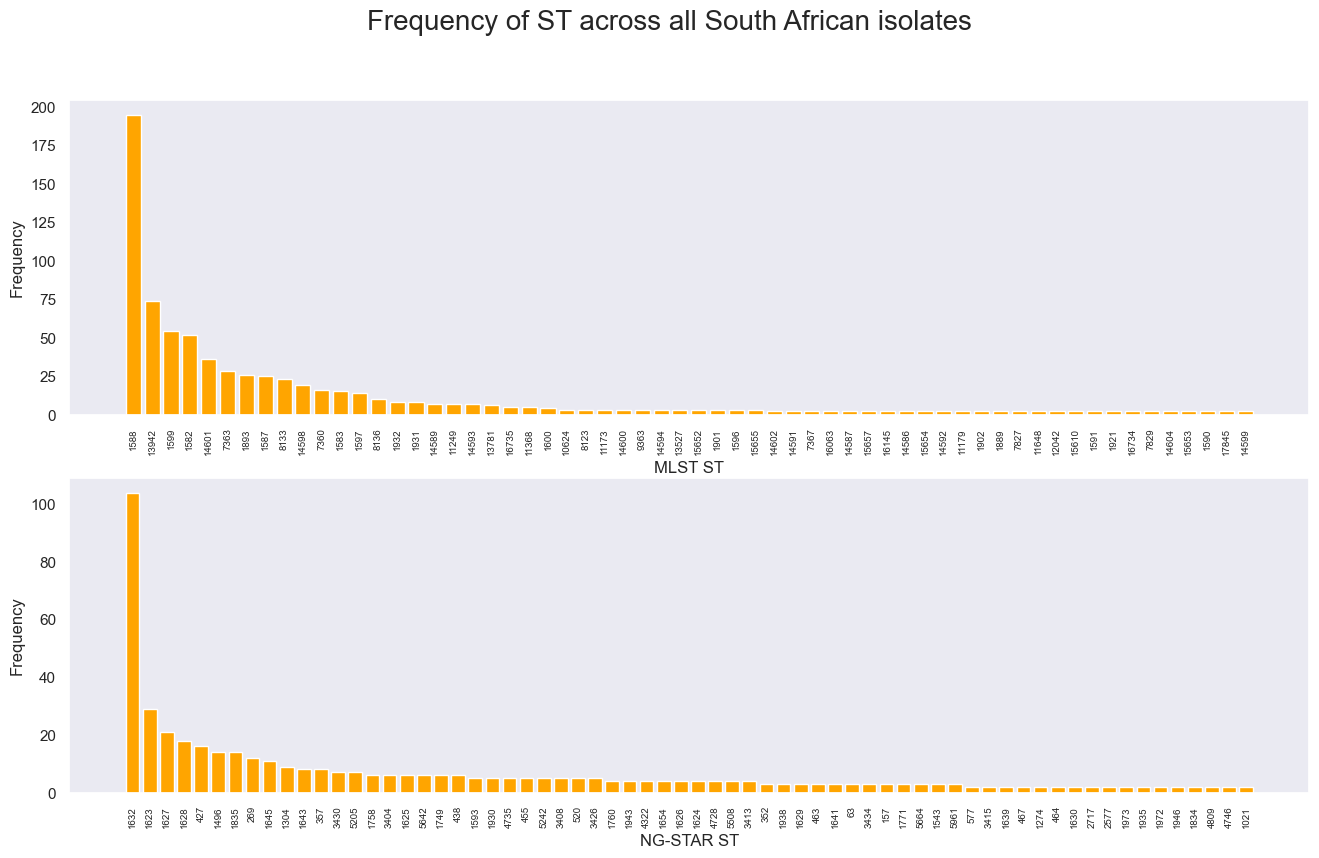

In [314]:
    # Doing the same process with data from across the whole of South Africa, including my data.

    # importing...
sa_mlst: pd.DataFrame = pd.read_csv("Data/sa_mlst.csv", sep = ",", header = "infer")
#sa_mlst.head()

    # converting variable type...
sa_mlst.ST = sa_mlst.ST.astype(str)
#sa_mlst.shape

    # removing low-frequency MLSTs...
sa_mlst2 = sa_mlst[sa_mlst.Frequency != 1]

    
    # Same process for NG-STAR STs...
sa_ngstar: pd.DataFrame = pd.read_csv("Data/sa_ngstar.csv", sep = ",", header = "infer")
#sa_ngstar.head()

sa_ngstar.ST = sa_ngstar.ST.astype(str)
#sa_ngstar.shape

sa_ngstar2 = sa_ngstar[sa_ngstar.Frequency != 1]


    # Plotting the figure...
fig, ax = plt.subplots(2,1, figsize = (16,9))

Functions.bar(x = sa_mlst2.ST, y = sa_mlst2.Frequency, xlab = "MLST ST", ylab = "Frequency", color = "orange", ax = ax[0])
    # Changing/adding labels
ax[0].set_xticklabels(sa_mlst2.ST, rotation = 90, fontsize = 7)

    # ...same process for NG-STAR ST frequencies of my South African sample
Functions.bar(x = sa_ngstar2.ST, y = sa_ngstar2.Frequency, xlab = "NG-STAR ST", ylab = "Frequency", color = "orange", ax = ax[1])
ax[1].set_xticklabels(sa_ngstar2.ST, rotation = 90, fontsize = 7)

    # Adding a title to the figure
fig.suptitle("Frequency of ST across all South African isolates", fontsize = 20)

    # Showing the figure
plt.show()

These bar graphs represent the same type of information as the above graphs, but for all South African isolates available on PubMLST.

In [315]:
    # re-ordering my South African MLST dataframe
my_top_mlst: pd.DataFrame = my_mlst.sort_values("Frequency", ascending = False)
#my_top_mlst.shape
my_top_mlst.head()

,ST,Frequency,Percentage
0,1588,184,27.54
1,13942,70,10.48
2,1582,48,7.19
3,1599,48,7.19
4,14601,32,4.79


In [316]:
    # re-ordering "all of South Africa" MLST dataframe
sa_top_mlst: pd.DataFrame = sa_mlst.sort_values("Frequency", ascending = False)
#sa_top_mlst.shape
sa_top_mlst.head()

,ST,Frequency,Percentage
0,1588,195,25.52
1,13942,74,9.69
2,1599,54,7.07
3,1582,52,6.81
4,14601,36,4.71


Here, I have simply ordered the MLST ST DataFrames in descending order, by Frequency. These show the top 5 most frequent MLST STs across both my South African isolates and all South African isolates.

In [317]:
    # re-ordering my South African NG-STAR ST dataframe
my_top_ngstar: pd.DataFrame = my_ngstar.sort_values("Frequency", ascending=False)
#my_top_ngstar.shape
my_top_ngstar.head()

,ST,Frequency,Percentage
0,1632,100,21.55
1,1623,28,6.03
2,1627,19,4.09
3,1628,17,3.66
4,427,15,3.23


In [318]:
    # re-ordering the "all South African" NG-STAR ST dataframe
sa_top_ngstar: pd.DataFrame = sa_ngstar.sort_values("Frequency", ascending=False)
#sa_top_ngstar.shape
sa_top_ngstar.head()

,ST,Frequency,Percentage
0,1632,104,19.62
1,1623,29,5.47
2,1627,21,3.96
3,1628,18,3.40
4,427,16,3.02


These are ordered versions of the NG-STAR ST DataFrames.

### cgMLST

In [319]:
    # conducting the same operations using cgMLST data for my South African sample
    
    # importing...
my_cgmlst: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst.csv", sep = ",", header = "infer")
#my_cgmlst.head()

    # converting variable type...
my_cgmlst.cgST = my_cgmlst.cgST.astype(str)

my_cgmlst.head()

,cgST,Frequency,Percentage
0,21989,2,0.28
1,19489,2,0.28
2,34507,2,0.28
3,27605,2,0.28
4,34509,2,0.28


Here, I have imported a dataset containing cgMLST ST information for my South African isolates.

<Axes: title={'center': 'Frequency of cgMLST ST in my South African sample'}, xlabel='ST', ylabel='Frequency'>

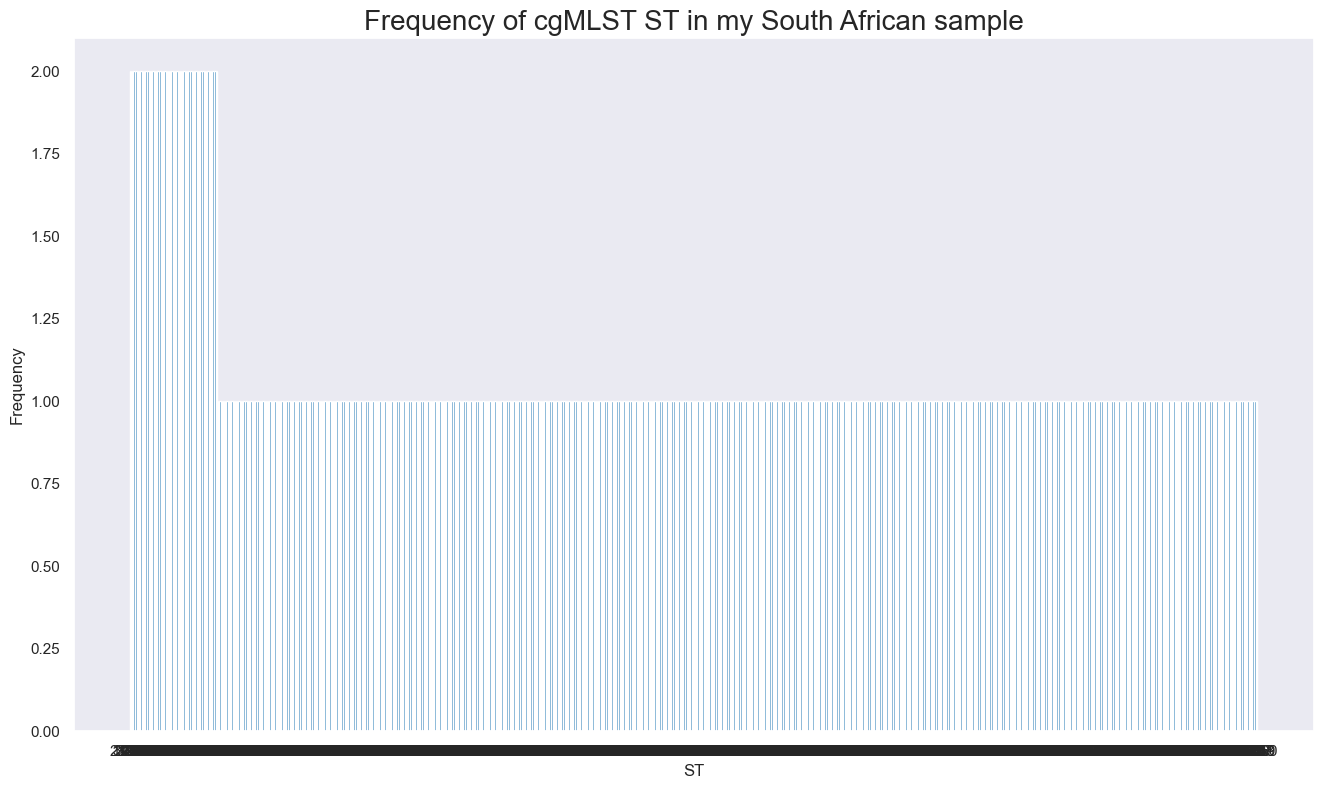

In [320]:
Functions.bar(x = my_cgmlst.cgST, y = my_cgmlst.Frequency, title = "Frequency of cgMLST ST in my South African sample", xlab = "ST", ylab = "Frequency")


Here, I have created a figure with a single bar graph. This displays the frequency of all cgMLST STs identified in my South African dataset. 

<Axes: title={'center': 'Frequency of cgMLST ST across all South African isolates'}, xlabel='ST', ylabel='Frequency'>

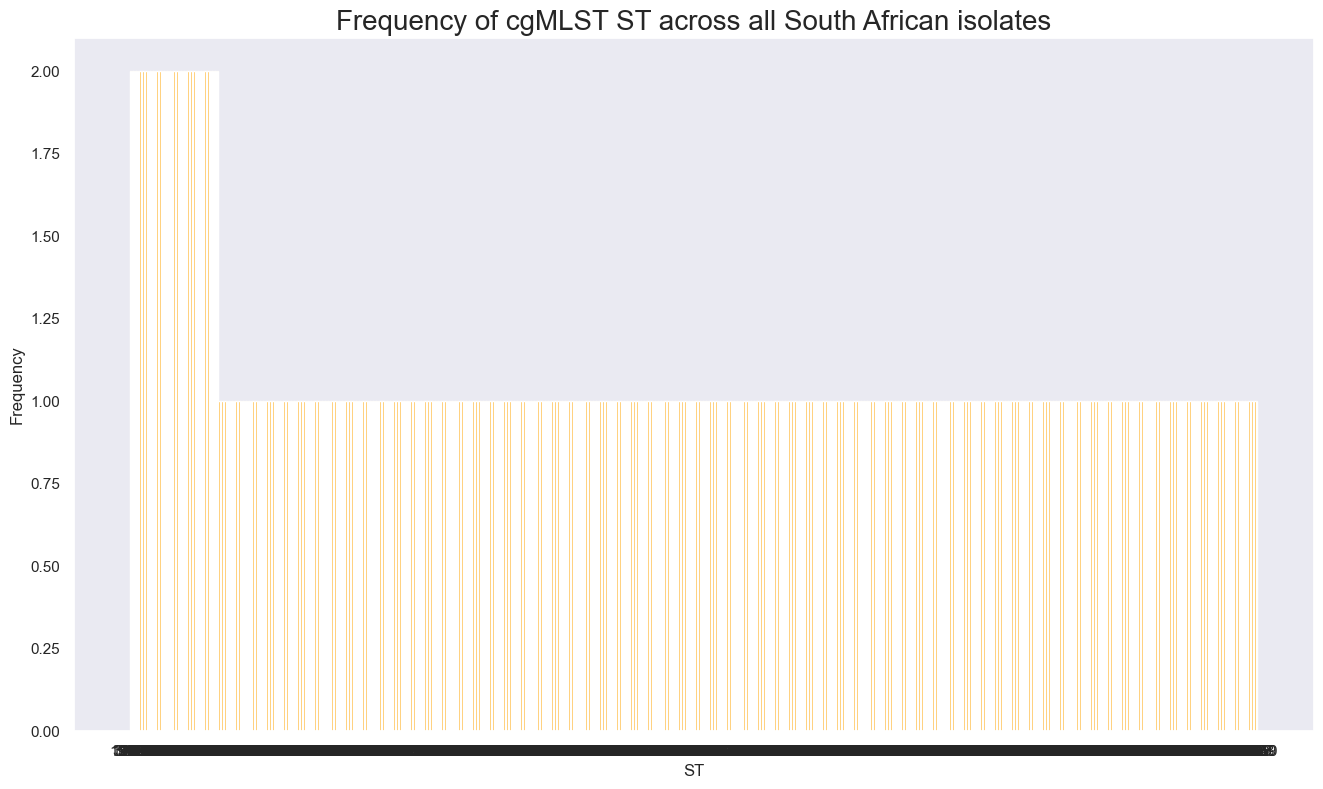

In [321]:
    # the same operations for cgMLST data from across the whole of South Africa, including my data

    # importing...
sa_cgmlst: pd.DataFrame = pd.read_csv("Data/sa_cgmlst.csv", sep = ",", header = "infer")
#sa_cgmlst.head()

    # changing variable type...
sa_cgmlst.cgST = sa_cgmlst.cgST.astype(str)


Functions.bar(x = sa_cgmlst.cgST, y = sa_cgmlst.Frequency, title = "Frequency of cgMLST ST across all South African isolates", xlab = "ST", ylab = "Frequency", color = "orange")


This figure represents the same type of information as the above bar graph, but reflects all South African isolates available on PubMLST.

In [322]:
    # ordering my South African cgMLST ST dataframe
my_top_cgmlst: pd.DataFrame = my_cgmlst.sort_values("Frequency", ascending = False)
#my_top_cgmlst.head(n = 10)
#my_top_cgmlst.shape

In [323]:
    # ordering the "all South Africa" cgMLST ST dataframe
sa_top_cgmlst: pd.DataFrame = sa_cgmlst.sort_values("Frequency", ascending = False)
#sa_top_cgmlst.head(n = 10)
#sa_top_cgmlst.shape

Here, I have simply ordered both cgMLST ST datasets in descending order, by Frequency. However, as there is a large variety of STs and the frequency of STs only ranges from 1-2, this isn't informative.

### Phenotypic AMR data

In [324]:
    # importing phenotypic AMR data for my South African isolates
my_amr: pd.DataFrame = pd.read_csv("Data/mydata_amr_prof.csv", sep = ",", header = "infer")
#my_amr.head()

    # renaming columns...
my_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#my_amr.head()


    # separating out the data for each antimicrobial, while removing rows with missing data
    # azithromycin
my_azi = my_amr.azi_sign.dropna(axis = 0, how = "any")
    # cefixime
my_cef = my_amr.cef_sir.dropna(axis = 0, how = "any")
    # ceftriaxone
my_ceftri = my_amr.ceftri_sir.dropna(axis = 0, how = "any")
    # ciprofloxacin
my_cipro = my_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting the frequency of S/I/R or </=/> for each antimicrobial
    # azithromycin
amr_azi = my_azi.groupby(my_azi).count()
#print(amr_azi)

    # cefixime
amr_cef = my_cef.groupby(my_cef).count()
#print(amr_cef)

    # ceftriaxone
amr_ceftri = my_ceftri.groupby(my_ceftri).count()
#print(amr_ceftri)

    # ciprofloxacin
amr_cipro = my_cipro.groupby(my_cipro).count()
#print(amr_cipro)


Here I have imported a dataset containing phenotypic AMR data for my South African isolates. I conducted some operations on this dataset:

1) Created individual DataFrames for each antimicrobial.
2) Created a series for each antimicrobial that summarises the number of records of S, I and R (Or <, = and > for MIC sign recordings) in their respective DataFrame.

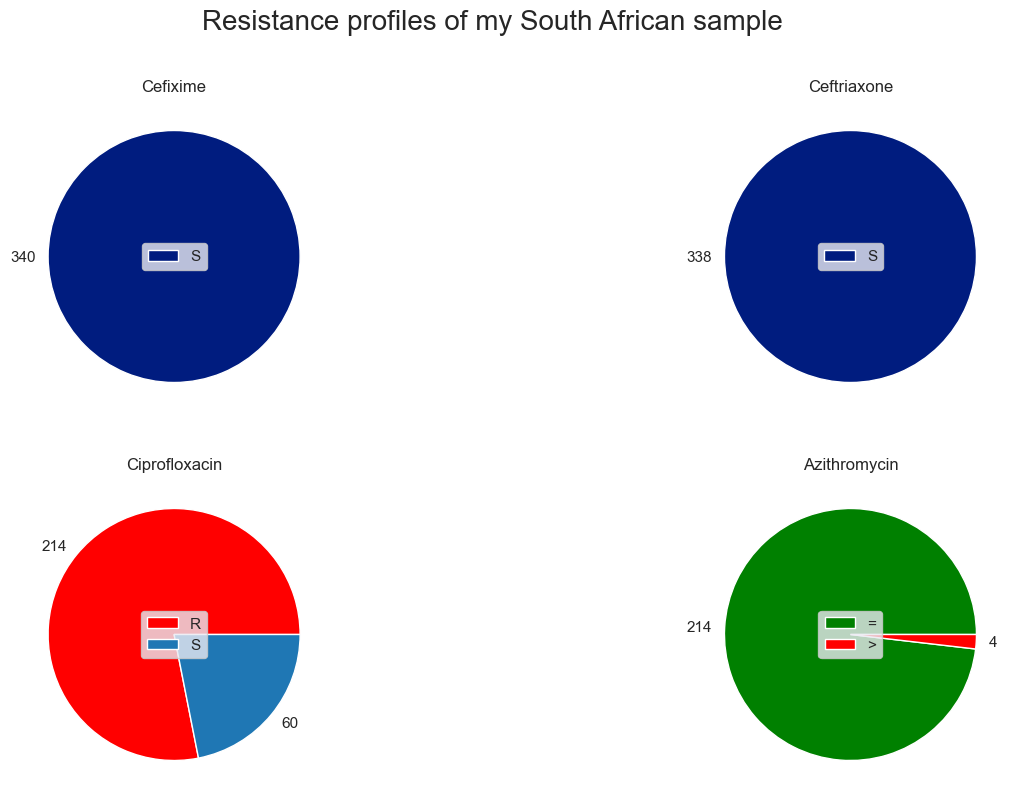

In [325]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # making a pie chart showing the results of phenotypic AMR tests to cefixime
Functions.pie(data = amr_cef, title = "Cefixime", ax = ax[0,0])

    # ...same for ceftriaxone
Functions.pie(data = amr_ceftri, title = "Ceftriaxone", ax = ax[0,1])

    # ...same for ciprofloxacin
Functions.pie(data = amr_cipro, title = "Ciprofloxacin", ax = ax[1,0], colors = ["red", "#1f77b4"])

    # ...same for azithromycin
Functions.pie(data = amr_azi, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 20)

plt.show()

Here I have created a figure with 4 subplots. Each pie chart corresponds to a different antimicrobial and shows the frequency of isolates in the my South African isolates dataset at each level of antimicrobial resistance.

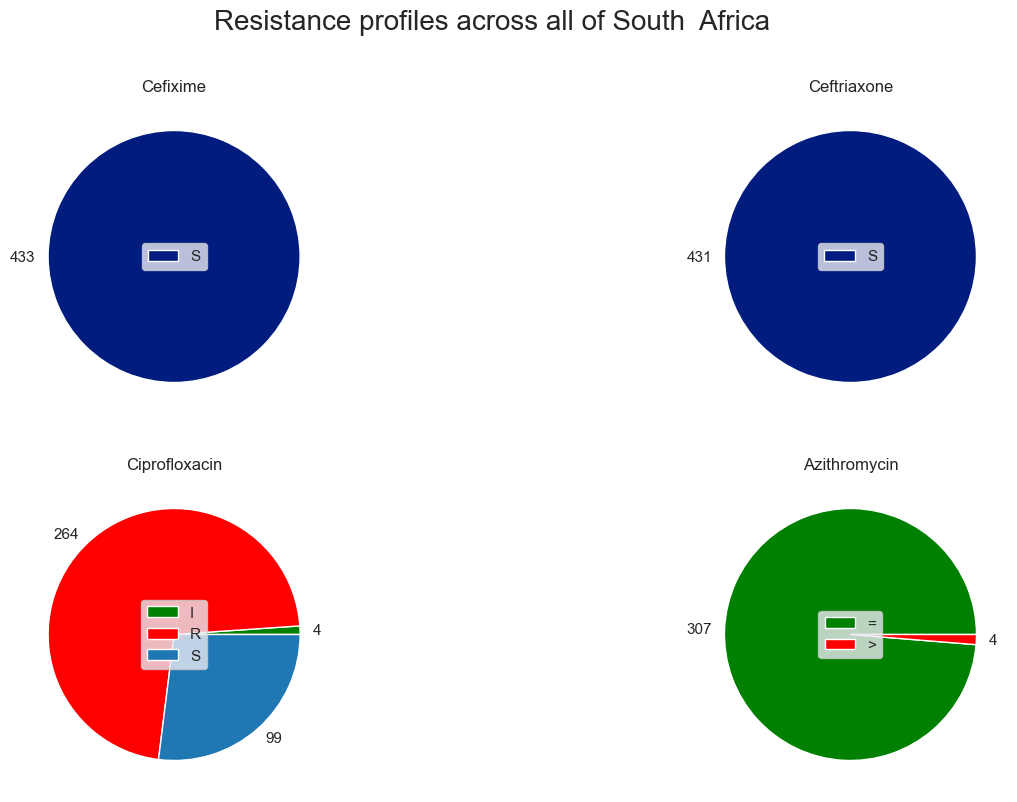

In [326]:
    # Same set of operations for phenotypic AMR data for the whole of South Africa, including my data
    
    # importing...
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")
#sa_amr.head()

    # renaming columns...
sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#sa_amr.head()

    # separating data by antimicrobial...
sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi2 = sa_azi.groupby(sa_azi).count()
#print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
#print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
#print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
#print(amr_cipro2)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef2, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri2, title = "Ceftriaxone", ax = ax[0,1])

    # ciprofloxacin
Functions.pie(data = amr_cipro2, title = "Ciprofloxacin", ax = ax[1,0],   colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi2, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across all of South  Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the above figure, however represents *all* South African isolates available on PubMLST.

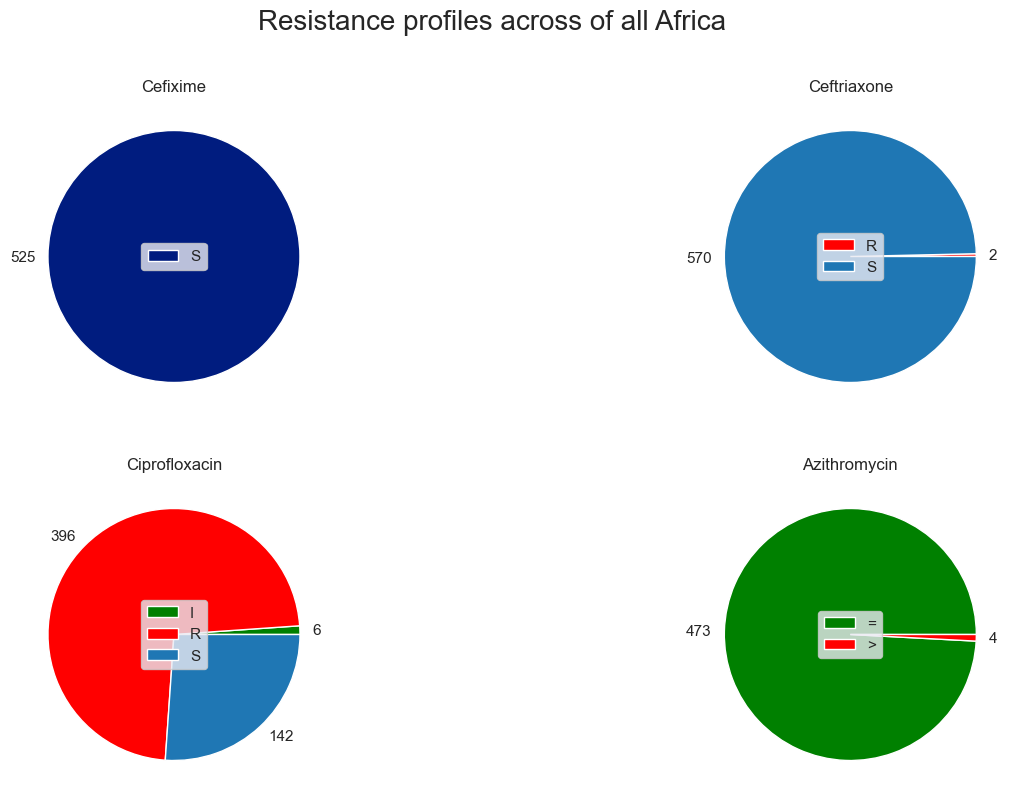

In [327]:
    # same process for phenotypic AMR data from across the continent of Africa, including my data
    
    # importing...
afr_amr: pd.DataFrame = pd.read_csv("Data/afr_amr_prof.csv", sep = ",", header = "infer")
#afr_amr.head()

    # renaming columns...
afr_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#afr_amr.head()


    # separating data my antimicrobial...
afr_azi = afr_amr.azi_sign.dropna(axis = 0, how = "any")
afr_cef = afr_amr.cef_sir.dropna(axis = 0, how = "any")
afr_ceftri = afr_amr.ceftri_sir.dropna(axis = 0, how = "any")
afr_cipro = afr_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi3 = afr_azi.groupby(afr_azi).count()
#print(amr_azi3)

amr_cef3 = afr_cef.groupby(afr_cef).count()
#print(amr_cef3)

amr_ceftri3 = afr_ceftri.groupby(afr_ceftri).count()
#print(amr_ceftri3)

amr_cipro3 = afr_cipro.groupby(afr_cipro).count()
#print(amr_cipro3)


    # creating a figure... 
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef3, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri3, title = "Ceftriaxone", ax = ax[0,1], colors = ["red", "#1f77b4"])

    # ciprofloxacin
Functions.pie(data = amr_cipro3, title = "Ciprofloxacin", ax = ax[1,0],  colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi3, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across of all Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the previous two figures, but reflects available isolate records from across the entire continent of Africa.

### LIN Code

In [328]:
    # Import LIN code data
my_lin: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst_lin.csv", sep = ",", header = "infer")
#my_lin

    
    # Cleaning the dataframe...
Functions.clean(my_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(5,15)), replace_val = [{"_": np.nan, "__": np.nan, "___": np.nan}])
    
    # Making LIN code prefixes categorical variables
my_lin.LIN1 = my_lin.LIN1.astype(str)
my_lin.LIN2 = my_lin.LIN2.astype(str)
my_lin.LIN3 = my_lin.LIN3.astype(str)
my_lin.LIN4 = my_lin.LIN4.astype(str)
#my_lin


    # Parsing out entries with no cgST/LIN code 
my_lin_missing = my_lin[my_lin["cgst"].isnull()]
#my_lin_missing
    # Counting the number of entries with no cgST/LIN code
my_lin_missing_count: pd.DataFrame = my_lin.isnull().sum()
#my_lin_missing_count

    # Identifying the entries with cgST/LIN code information
my_lin_clean: pd.DataFrame = my_lin.dropna(axis = 0, how = "any")
#my_lin_clean.head()


    # counting the proportion of each LIN code prefix (1 bin(s))
my_lin_prop1: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN1")

    # 2 bin(s)
my_lin_prop2: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN2")
    
    # 3 bin(s)
my_lin_prop3: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN3")

    # 4 bin(s)
my_lin_prop4: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN4")


Here I have imported a dataset containing cgMSLT ST and LIN code information my South African isolates. I conducted some operations on this data:

1) Created a "missing" version of the dataset, containing rows for isolates with no cgMLST ST/LIN code.
2) Created a "cleaned" version of the dataset that only contains rows with cgMLST ST and LIN code for isolates.
3) Created a set of series containing proportion information for prefixes of 1-4 bins.
4) In each series, squashed prefixes that have a frequency of <= 3% into a new label, "Other".

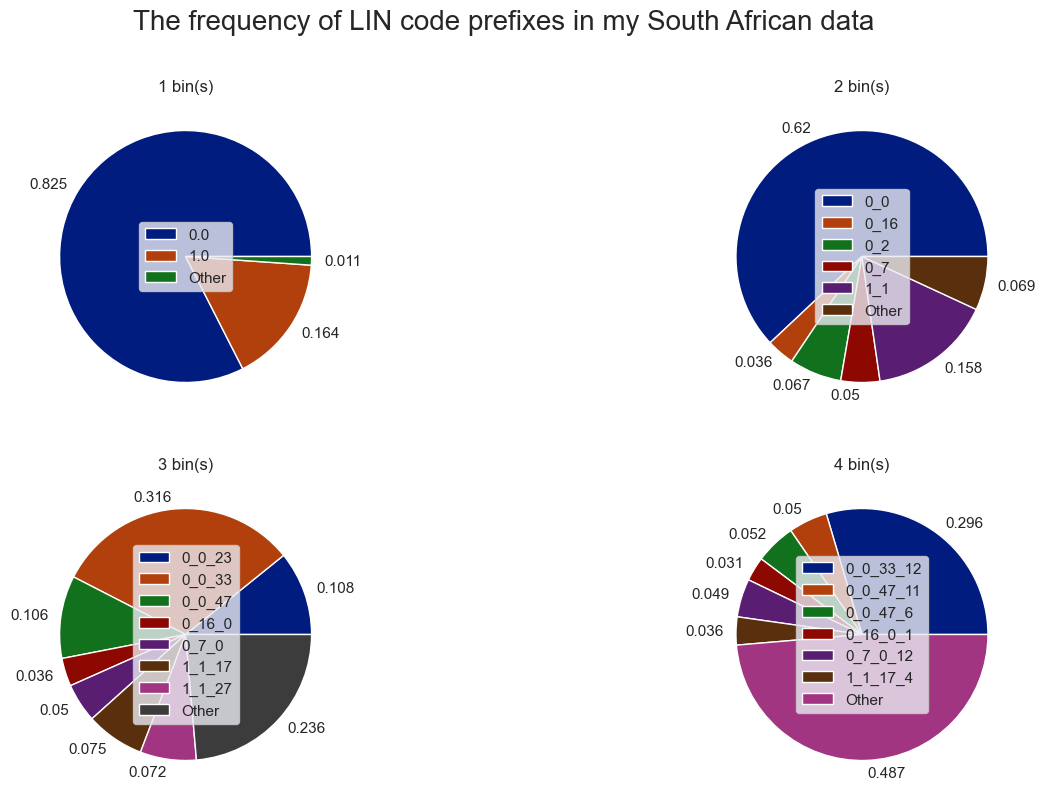

In [329]:
    # creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = my_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = my_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = my_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = my_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes in my South African data", fontsize = 20)

plt.show()

I have created a figure with 4 subplots. Each is a pie chart showing the proportion of LIN code prefixes (at a certain number of bins) in my South African dataset.

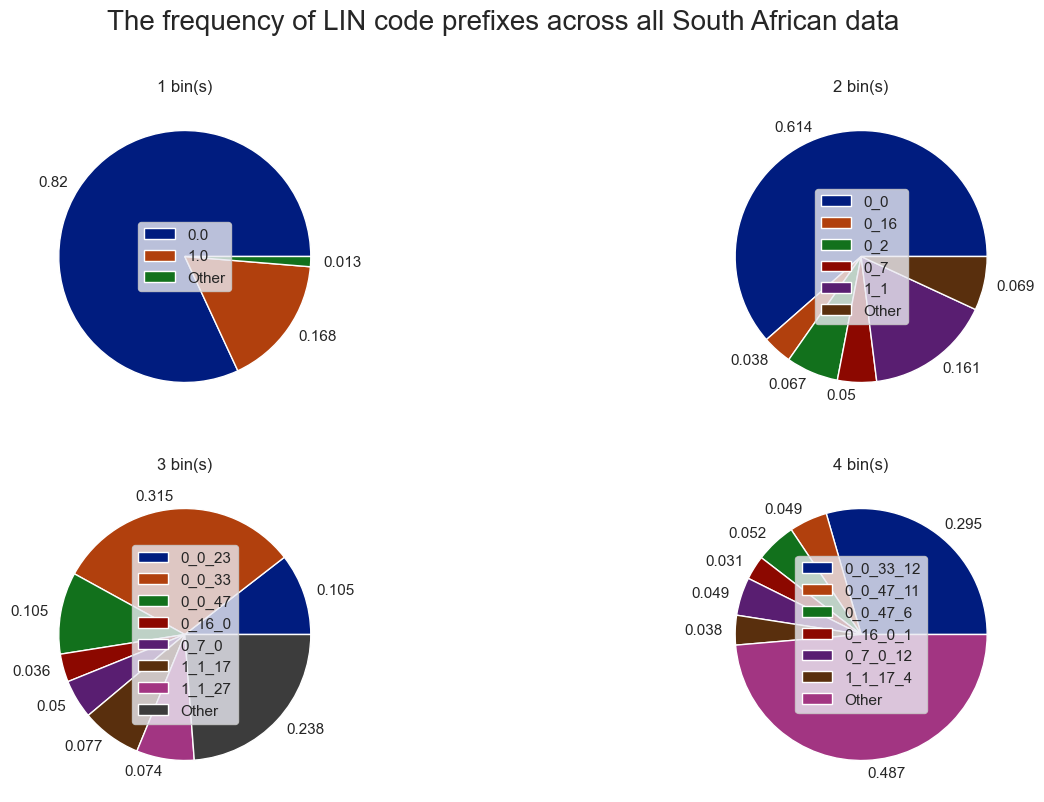

In [330]:
    # conducting the same operations for cgMLST/LIN code data for all of South Africa, including my data

    # Importing...
sa_lin: pd.DataFrame = pd.read_csv("Data/sa_cgmlst_lin.csv", sep = ",", header = "infer")
#sa_lin


    # Cleaning the dataframe...
Functions.clean(sa_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(7,15)), replace_val = [
    {"_": np.nan, "__": np.nan, "___": np.nan}])
    
    
    # Changing variable type...
sa_lin.LIN1 = sa_lin.LIN1.astype(str)
sa_lin.LIN2 = sa_lin.LIN2.astype(str)
sa_lin.LIN3 = sa_lin.LIN3.astype(str)
sa_lin.LIN4 = sa_lin.LIN4.astype(str)
#sa_lin


    # Parsing out entries with missing data...
sa_lin_missing = sa_lin[sa_lin["cgst"].isnull()]
#sa_lin_missing
    # Counting the number of entries with missing data...
sa_lin_missing_count: pd.DataFrame = sa_lin.isnull().sum()
#sa_lin_missing_count

    # Identifying entries with data...
sa_lin_clean: pd.DataFrame = sa_lin.dropna(axis = 0, how = "any")
#sa_lin_clean


    # Counting the proportion of prefixes, 1 bin(s)...
sa_lin_prop1: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN1")

    # 2 bin(s)
sa_lin_prop2: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN2")
    
    # 3 bin(s)
sa_lin_prop3: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN3")

    # 4 bin(s)
sa_lin_prop4: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = sa_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = sa_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = sa_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = sa_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all South African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous figure, but for isolates collected across the whole of South Africa.

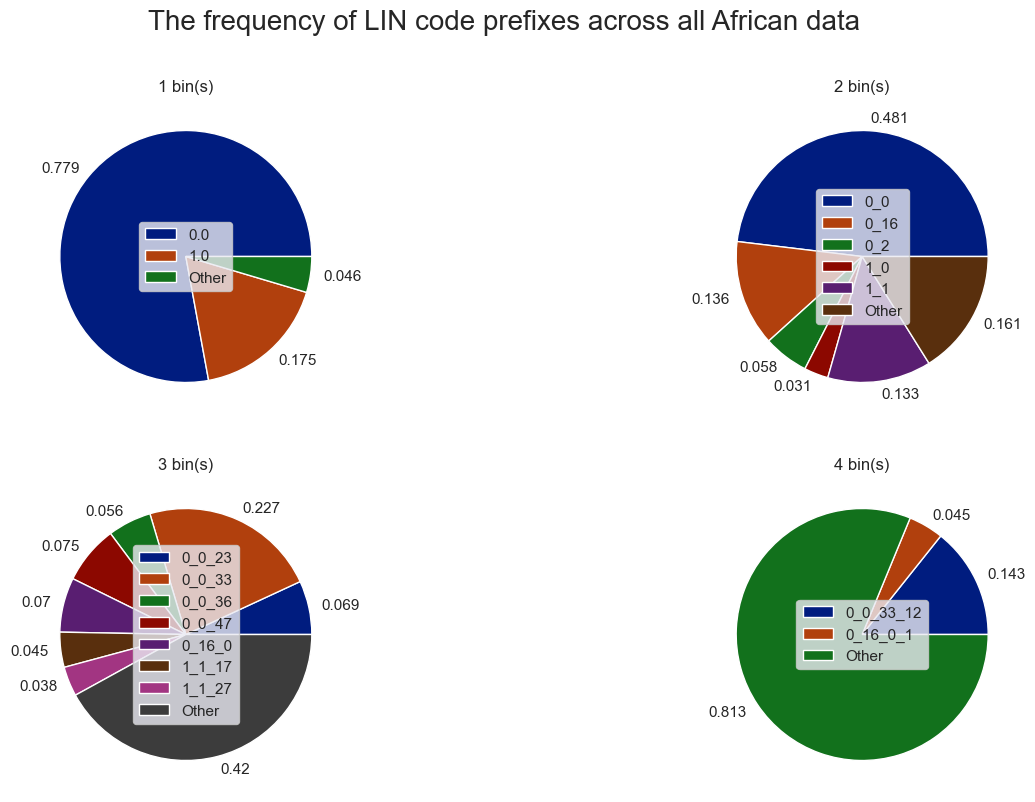

In [331]:
    # conducting the same operations for cgMLST/LIN code data for the whole of Africa, including my data

    # Importing...
afr_lin: pd.DataFrame = pd.read_csv("Data/afr_cgmlst_lin.csv", sep = ",", header = "infer")
#afr_lin


        # Cleaning the dataframe...
Functions.clean(afr_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(6,15)), replace_val = [{"_": np.nan, "__": np.nan, "___": np.nan}])
    
    
    # Changing variable type...
afr_lin.LIN1 = afr_lin.LIN1.astype(str)
afr_lin.LIN2 = afr_lin.LIN2.astype(str)
afr_lin.LIN3 = afr_lin.LIN3.astype(str)
afr_lin.LIN4 = afr_lin.LIN4.astype(str)
#afr_lin


    # Parsing out entries with missing data...
afr_lin_missing = afr_lin[afr_lin["cgst"].isnull()]
#afr_lin_missing
    # Counting the number of entries with missing data...
afr_lin_missing_count: pd.DataFrame = afr_lin.isnull().sum()
#afr_lin_missing_count

    # Identifying entries with data...
afr_lin_clean: pd.DataFrame = afr_lin.dropna(axis = 0, how = "any")
#afr_lin_clean


    # Counting the proportion of prefixes, 1 bin(s)...
afr_lin_prop1: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN1")

    # 2 bin(s)
afr_lin_prop2: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN2")
    
    # 3 bin(s)
afr_lin_prop3: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN3")

    # 4 bin(s)
afr_lin_prop4: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = afr_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = afr_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = afr_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = afr_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all African data", fontsize = 20)

plt.show()


This figure represents the same type of information as the previous two figures, but for isolates collected across the whole of the continent of Africa.

### Genotypic AMR data
#### PenA

In [332]:
    # importing beta-lactamase amr data for my South African sample 
my_betalac_amr: pd.DataFrame = pd.read_csv("Data/my_betalac_amr.csv", sep = ",", header = "infer")
my_betalac_amr.head()

    
    # separating out data for PenA specifically
my_pena: pd.DataFrame =  my_betalac_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]


    # removing rows containing NAs
my_pena = my_pena.dropna(axis = 0, how = "any")

    # cleaning function
Functions.clean(my_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # counting the frequency of each PenA allele and ranking them
my_pena_count: pd.Series = Functions.allele_rank(df = my_pena, var = "pena")

my_pena_count

pena
228.0    229
23.0     141
294.0    130
285.0     96
166.0     53
Other     45
Name: pena, dtype: int64

<Axes: title={'center': 'The frequency of alleles at the penA locus in my South African sample'}>

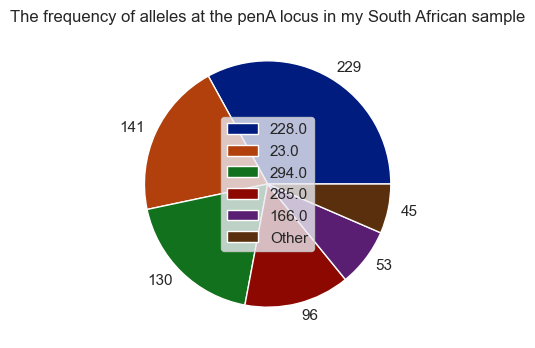

In [333]:
Functions.pie(data = my_pena_count, title = "The frequency of alleles at the penA locus in my South African sample")


Here, I have created a pie chart that shows the frequency of different allele ids for the PenA locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [334]:
    # same process but for genotypic amr data from all available South African samples...
    
    # importing...
sa_betalac_amr: pd.DataFrame = pd.read_csv("Data/sa_betalac_amr.csv", sep = ",", header = "infer")
sa_betalac_amr.head()

    
    # separating out PenA...
sa_pena: pd.DataFrame =  sa_betalac_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
sa_pena = sa_pena.dropna(axis = 0, how = "any")

    # cleaning function
Functions.clean(sa_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # ranking allele frequencies...
sa_pena_count: pd.Series = Functions.allele_rank(sa_pena, var = "pena")


<Axes: title={'center': 'The frequency of alleles at the penA locus across all South African isolates'}>

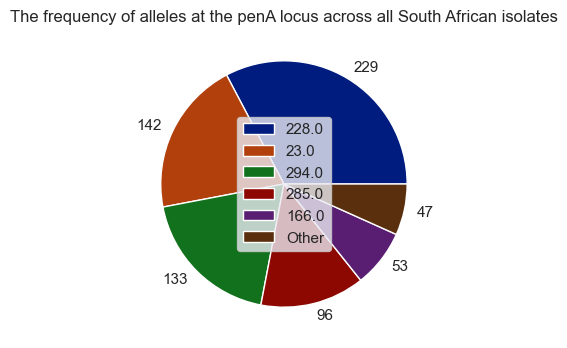

In [335]:
Functions.pie(data = sa_pena_count, title = "The frequency of alleles at the penA locus across all South African isolates")

This figure shows the same type of information as the previous figure, but across all South African isolates available:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These allele IDs are the same/in the same order as in my South African sample. While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [336]:
    # same process but for genotypic amr data from across the whole of Africa...
    
    # importing...
afr_betalac_amr: pd.DataFrame = pd.read_csv("Data/afr_betalac_amr.csv", sep = ",", header = "infer")
afr_betalac_amr.head()

    
    # separating out PenA...
afr_pena: pd.DataFrame =  afr_betalac_amr[["id", "isolate", "country", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
afr_pena = afr_pena.dropna(axis = 0, how = "any")
    
    # cleaning function
Functions.clean(df = afr_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")

    # ranking allele frequencies...
afr_pena_count: pd.Series = Functions.allele_rank(df = afr_pena, var = "pena")


<Axes: title={'center': 'The frequency of alleles at the penA locus across all African isolates'}>

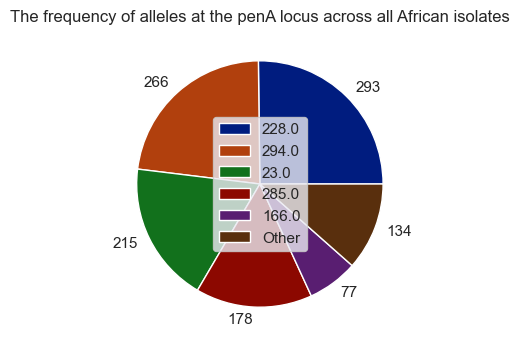

In [337]:
Functions.pie(data = afr_pena_count, title = "The frequency of alleles at the penA locus across all African isolates")

This figure shows the same type of information as the previous two figures, but across the continent of Africa:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 294: type XIV; non-mosaic; mutation(s): F504→L
3) allele 23: type II; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These alleles are the same as in my South African sample/the whole of South Africa dataset. The only difference is that the Rank 2 & 3 alleles in this dataset are swapped around in the former two datasets.

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

### 23S RNA (???)

In [338]:
    # importing genotypic amr data, according to the NG-STAR scheme, for my South African sample
my_ngstar_amr: pd.DataFrame = pd.read_csv("Data/my_ngstar_amr.csv", sep = ",", header = "infer")
my_ngstar_amr.head()

    
    # separating out 23S RNA...
my_23s: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_23S"]]

    # removing rows containing NAs...
my_23s = my_23s.dropna(axis = 0, how = "any")
    
    # cleaning function
Functions.clean(df = my_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # counting allele frequencies...
my_23s_count: pd.Series = my_23s.groupby("ng_23s").ng_23s.count()


Because there are only 4 alleles present in this sample, I did not rank/group alleles.

<Axes: title={'center': 'The frequency of alleles at the 23S locus in my South African sample'}>

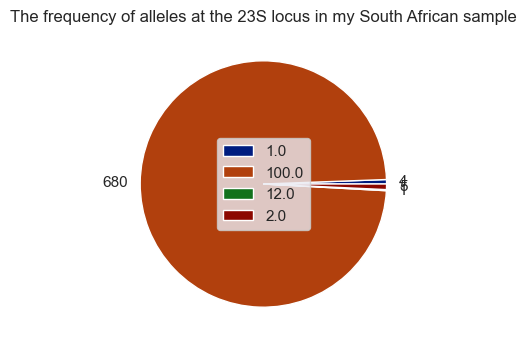

In [339]:
Functions.pie(data = my_23s_count, title = "The frequency of alleles at the 23S locus in my South African sample")

This pie chart shows the frequency of alleles at the 23S locus (under the NG-STAR typing scheme) in my South African sample. Because Ng only has 4 alleles at this locus, there is no "other" segment:
1) allele 1:
2) allele 100:
3) allele 12:
4) allele 2:

### mtrR

In [340]:
my_ngstar_amr.head()
  
    # separating out mtrR...
my_mtrr: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
my_mtrr = my_mtrr.dropna(subset = ["'mtrR"])
    # simplifying column name(s)...

    # cleaning function
Functions.clean(df = my_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
my_mtrr_count: pd.Series = Functions.allele_rank(df = my_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus in my South African sample'}>

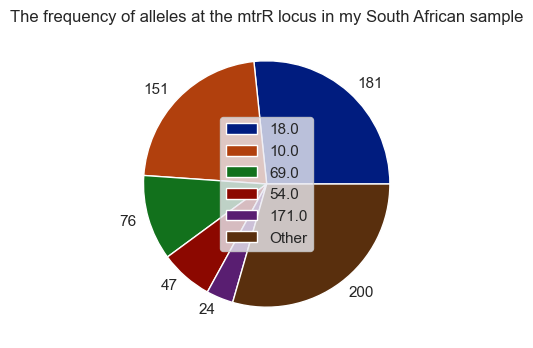

In [341]:
Functions.pie(data = my_mtrr_count, title = "The frequency of alleles at the mtrR locus in my South African sample")

Here, I have created a pie chart that shows the frequency of different allele ids for the 'mtrR locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

The A39T mutation is not not to be associated with resistance to any antimicrobials.

In [342]:
    # same process but for genotypic amr data from all of South Africa...

    # importing
sa_ngstar_amr: pd.DataFrame = pd.read_csv("Data/sa_ngstar_amr.csv", sep = ",", header = "infer")
sa_ngstar_amr.head()
  
    # separating out mtrR...
sa_mtrr: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
sa_mtrr = sa_mtrr.dropna(subset = ["'mtrR"])
    
    # cleaning function
Functions.clean(df = sa_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")
    

    # ranking allele frequencies...
sa_mtrr_count: pd.Series = Functions.allele_rank(df = sa_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all South African isolates'}>

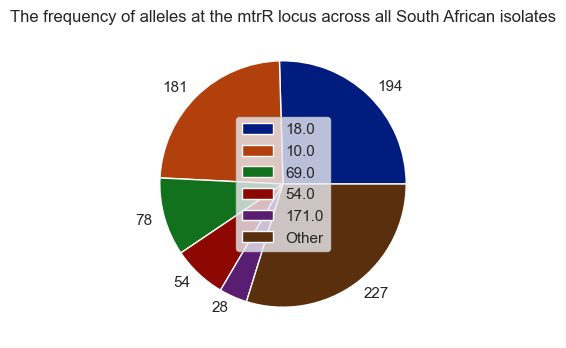

In [343]:
Functions.pie(data = sa_mtrr_count, title = "The frequency of alleles at the mtrR locus across all South African isolates")

This figure shows the same type of information as the previous, but across all available South African isolates:
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

These allele IDs are the same as in my South African sample. The A39T mutation is not not to be associated with resistance to any antimicrobials.

In [344]:
    # same process but for genotypic amr data from all aross Africa...

    # importing
afr_ngstar_amr: pd.DataFrame = pd.read_csv("Data/afr_ngstar_amr.csv", sep = ",", header = "infer")
afr_ngstar_amr.head()
  
    # separating out mtrR...
afr_mtrr: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
afr_mtrr = afr_mtrr.dropna(subset = ["'mtrR"])

    # cleaning function
Functions.clean(df = afr_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
afr_mtrr_count: pd.Series = Functions.allele_rank(df = afr_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all African isolates'}>

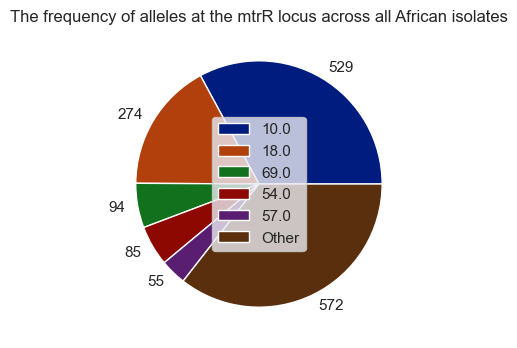

In [345]:
Functions.pie(data = afr_mtrr_count, title = "The frequency of alleles at the mtrR locus across all African isolates")

This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 10; mutations: A39T
2) allele 18; Wild Type
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 57: Wild Type

Alleles ranked 1-4 are present in both of the previous two collections analysed (albeit in different order) but the rank 5 allele *57* is not. The A39T mutation is not not to be associated with resistance to any antimicrobials.

### PorB

In [346]:
my_ngstar_amr.head()
  
    # separating out porB...
my_porb: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
my_porb = my_porb.dropna(subset = ["NG_porB"])

    # simplifying column name(s)...
Functions.clean(df = my_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
my_porb_count: pd.Series = Functions.allele_rank(df = my_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus in my South African sample'}>

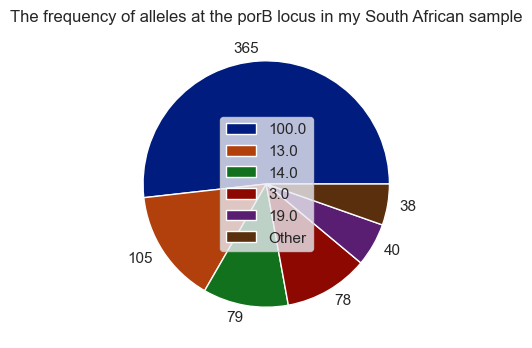

In [347]:
Functions.pie(data = my_porb_count, title = "The frequency of alleles at the porB locus in my South African sample")


This figure shows the frequency of alleles at the porB locus (under the NG-STAR scheme) in my South African sample. Explicitly shown are the 5 most frequent alleles, with the other low-frequency alleles being grouped together:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

None of these variants/mutations are associated with antimicrobial resistance.

In [348]:
sa_ngstar_amr.head()
  
    # separating out porB...
sa_porb: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
sa_porb = sa_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = sa_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
sa_porb_count: pd.Series = Functions.allele_rank(df = sa_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all South African isolates'}>

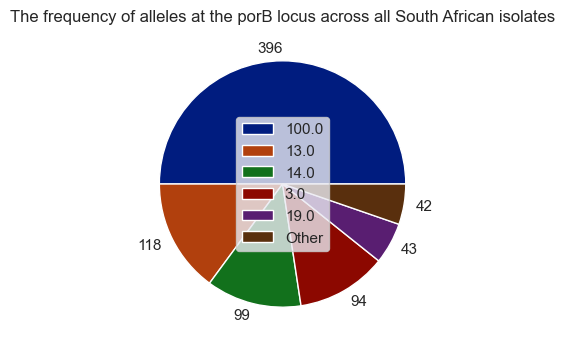

In [349]:
Functions.pie(data = sa_porb_count, title = "The frequency of alleles at the porB locus across all South African isolates")


This figure shows same type of information as the previous graph, but for all available South African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

In [350]:
afr_ngstar_amr.head()
  
    # separating out porB...
afr_porb: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
afr_porb = afr_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = afr_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
afr_porb_count: pd.Series = Functions.allele_rank(df = afr_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all African isolates'}>

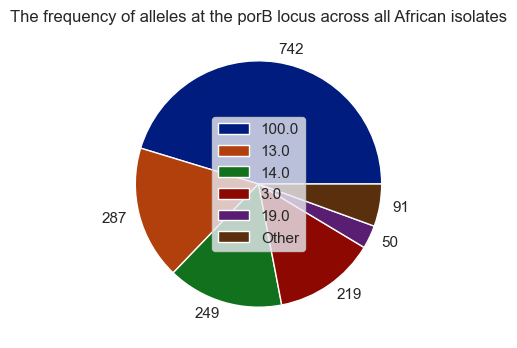

In [351]:
Functions.pie(data = afr_porb_count, title = "The frequency of alleles at the porB locus across all African isolates")


This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

### GyrA

In [352]:
my_ngstar_amr.head()
  
    # separating out gyrA...
my_gyra: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
my_gyra = my_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning column name(s)...
Functions.clean(df = my_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
my_gyra_count: pd.Series = Functions.allele_rank(df = my_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus my South African sample'}>

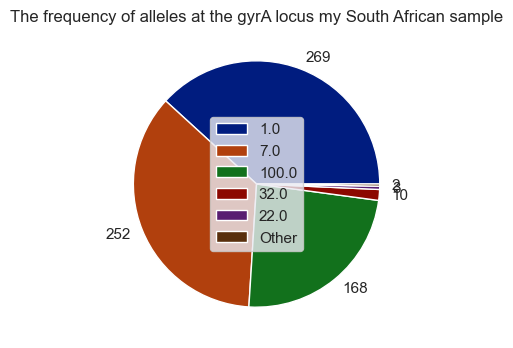

In [353]:
Functions.pie(data = my_gyra_count, title = "The frequency of alleles at the gyrA locus my South African sample")


This figure shows the frequency of alleles at the gyrA locus (under the NG-STAR typing scheme) for my South African sample. Explicitly shown are the 5 most frequency alleles, with other low-frequency alleles being grouped together:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [354]:
sa_ngstar_amr.head()
  
    # separating out gyrA...
sa_gyra: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
sa_gyra = sa_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = sa_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
sa_gyra_count: pd.Series = Functions.allele_rank(df = sa_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all South African isolates'}>

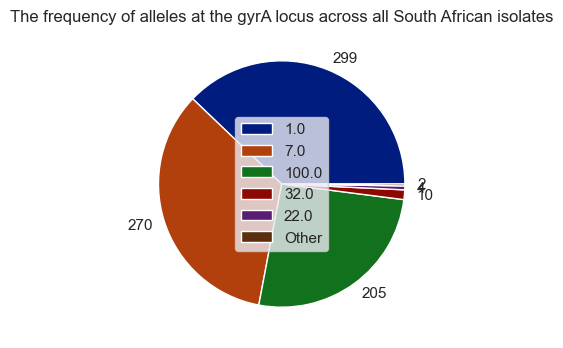

In [355]:
Functions.pie(data = sa_gyra_count, title = "The frequency of alleles at the gyrA locus across all South African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

This order is the same as the ranking in my South African sample. The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [356]:
afr_ngstar_amr.head()
  
    # separating out gyrA...
afr_gyra: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
afr_gyra = afr_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = afr_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
afr_gyra_count: pd.Series = Functions.allele_rank(df = afr_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all African isolates'}>

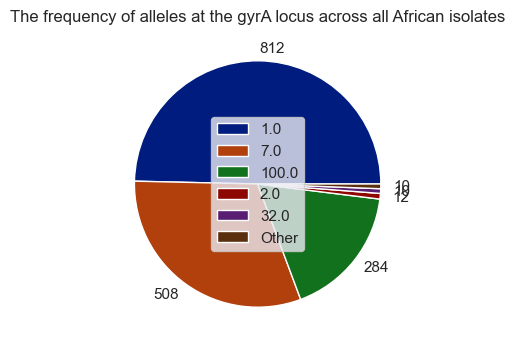

In [357]:
Functions.pie(data = afr_gyra_count, title = "The frequency of alleles at the gyrA locus across all African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 2: Mutation(s): S91F, **D95N**; Ciprofloxacin: >32		
5) allele 32; Mutations(s): S91F, D95G

Alleles ranked 1-3 by frequency are also found in this order in my South African sample. The Rank 4 allele is a frequency allele in my South African sample, and allele 32 is instead ranked at 5 across all African isolates, instead of 4 as in my South African sample.

The mutations S91F, D95G and D95N are known to be associated with resistance to Quinolones. 

### ponA

In [358]:

my_ngstar_amr.head()

    # separating out ponA...
my_pona: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
my_pona = my_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = my_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
my_pona_count: pd.Series = my_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus in my South African sample'}>

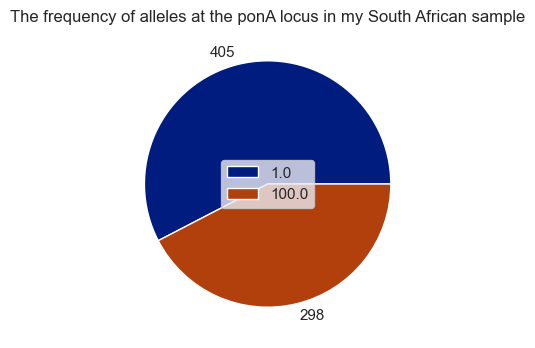

In [359]:
Functions.pie(data = my_pona_count, title = "The frequency of alleles at the ponA locus in my South African sample")


This figure shows the frequency of alleles at the ponA locus in my South African sample. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [360]:
    # same procedure but for all available South African isolates...
    
sa_ngstar_amr.head()

    # separating out ponA...
sa_pona: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
sa_pona = sa_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = sa_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
sa_pona_count: pd.Series = sa_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all South African isolates'}>

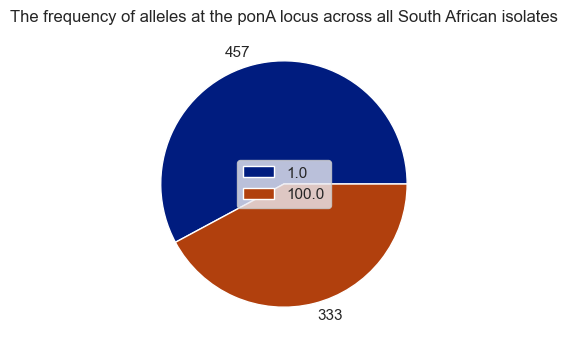

In [361]:
Functions.pie(data = sa_pona_count, title = "The frequency of alleles at the ponA locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [362]:
    # same procedure but for all available African isolates...
    
afr_ngstar_amr.head()

    # separating out ponA...
afr_pona: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_ponA"]]

    # removing rows containing NAs...
afr_pona = afr_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = afr_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
afr_pona_count: pd.Series = afr_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all African isolates'}>

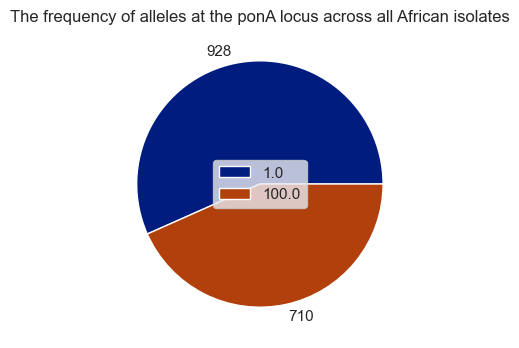

In [363]:
Functions.pie(data = afr_pona_count, title = "The frequency of alleles at the ponA locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

### parC

In [364]:

my_ngstar_amr.head()

    # separating out parC...
my_parc: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
my_parc = my_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = my_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
my_parc_count: pd.Series = Functions.allele_rank(df = my_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus in my South African sample'}>

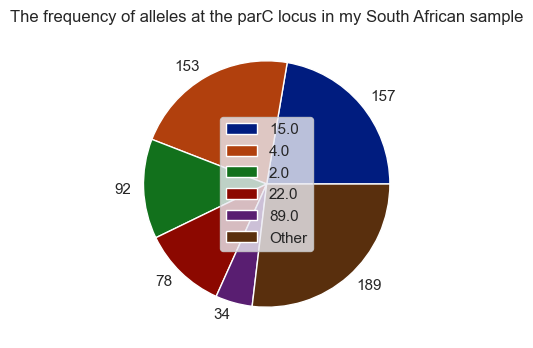

In [365]:
Functions.pie(data = my_parc_count, title = "The frequency of alleles at the parC locus in my South African sample")


This figure shows the frequency of alleles at the parC locus in my South African sample. Explicitly shown are the top 5 most frequent alleles, with other low-frequency alleles being grouped together:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [366]:
    # same procedures, but for all available South African isolates

sa_ngstar_amr.head()

    # separating out parC...
sa_parc: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
sa_parc = sa_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = sa_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
sa_parc_count: pd.Series = Functions.allele_rank(df = sa_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all South African isolates'}>

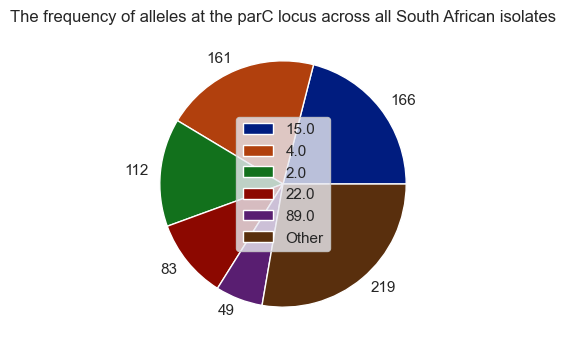

In [367]:
Functions.pie(data = sa_parc_count, title = "The frequency of alleles at the parC locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

This is the same ranking as in my South African sample. The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [368]:
    # same procedures, but for all available African isolates

afr_ngstar_amr.head()

    # separating out parC...
afr_parc: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_parC"]]

    # removing rows containing NAs...
afr_parc = afr_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = afr_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
afr_parc_count: pd.Series = Functions.allele_rank(df = afr_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all African isolates'}>

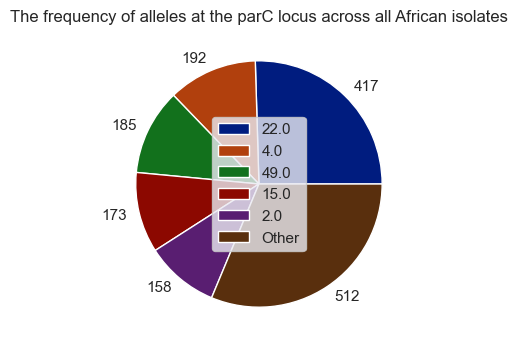

In [369]:
Functions.pie(data = afr_parc_count, title = "The frequency of alleles at the parC locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates:
1) allele 22: Wild Type
2) allele 4: Mutations(s): D86N
3) allele **49**: Wild Type 
4) allele 15: Mutation(s): S87N
5) allele 2: Wild Type

Four of the 5 most frequent alleles in the my South African sample & all South African collection are present in this collection of isolates (22, 4, 15 & 2). However, allele 89 is no longer in the top 5 most frequent alleles. There is now allele 49.

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.